<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 1: Practical - Linear Regression <br> <br>
<font color=686880 size=4>
    TAs: Arman Malekzadeh - Yalda Shabanzadeh - Arshia Soltani Moakhar
    
____

### Full Name : Mohammad Javad Maheronnaghsh
### Student Number : 99105691
___
Link to this: https://colab.research.google.com/drive/1i9QKCUBT2EDFH5ejhh_30_rGlJg8jvc5?usp=sharing

In [58]:
# run this to download the dataset
!wget -O 'dataset.csv' https://www.dropbox.com/s/2ny75tb1ic141yw/assignment1.csv?dl=0

--2023-03-10 20:14:48--  https://www.dropbox.com/s/2ny75tb1ic141yw/assignment1.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2ny75tb1ic141yw/assignment1.csv [following]
--2023-03-10 20:14:48--  https://www.dropbox.com/s/raw/2ny75tb1ic141yw/assignment1.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucba335e95129f6c35ba9c04a104.dl.dropboxusercontent.com/cd/0/inline/B39nzJE3bA9fZskNeZK7ZTyWvVQZgO3FljWjwRAgWnzP6x3KSCajXnhVUMh9ucHaXgxj25HpTtGqGZJH1W3bjSvqpR7TFKAPo4JZCvlg5MCtet7vN4WqUhIK8CZktVH9EWsCRqLhsoANYRT4wdDVYnCOfm36udXkoM4sV95mZJszxg/file# [following]
--2023-03-10 20:14:48--  https://ucba335e95129f6c35ba9c04a104.dl.dropboxusercontent.com/cd/0/inline/B39nzJE3bA9fZskNeZK7ZTyWvVQZgO3FljWjwRAgWnzP6x3KSCajXnhVUMh9ucH

In [59]:
# you can use the following libraries
import pandas
import sklearn
import numpy as np
from joblib import dump, load
from matplotlib import pyplot as plt
import os

# Phase 1: Explore

## Sec 1: What do we have here?

load the dataset (as a dataframe) using pandas

In [60]:
df = pandas.read_csv("dataset.csv")

display the top rows of the dataframe (top 5 is enough)

In [61]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


print the names of the columns

In [62]:
list(df.columns)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

what values can the `region` column take? print the unique values using pandas

In [63]:
list(pandas.unique(df['region']))

['southwest', 'southeast', 'northwest', 'northeast']

get the number of rows in the dataset

In [64]:
df.shape[0]

1338

make a new column named `rounded_bmi` by rounding each value of the column `bmi` | keep the `bmi` column

In [65]:
df['rounded_bmi'] = round(df['bmi'])

## Sec 2: Perform EDA

perform EDA on the dataset (e.g., see if there are null values)

In [66]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   rounded_bmi  1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


,age,bmi,children,charges,rounded_bmi
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,30.663677
std,14.049960,6.098187,1.205493,12110.011237,6.096007
min,18.000000,15.960000,0.000000,1121.873900,16.000000
25%,27.000000,26.296250,0.000000,4740.287150,26.000000
50%,39.000000,30.400000,1.000000,9382.033000,30.000000
75%,51.000000,34.693750,2.000000,16639.912515,35.000000
max,64.000000,53.130000,5.000000,63770.428010,53.000000


## Sec 3: Do linear relationships exist?

plot `age` against `charges` | **hint**: you can use matplotlibs

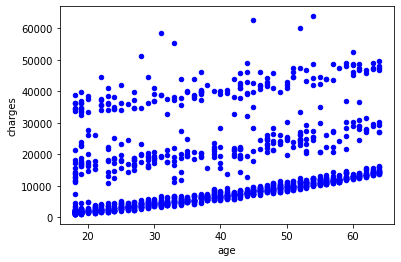

In [67]:
df.plot(kind='scatter',x='age',y='charges',color='blue')
plt.show()

print the correlation coefficients matrix

In [68]:
df.corr()

,age,bmi,children,charges,rounded_bmi
age,1.000000,0.109272,0.042469,0.299008,0.109527
bmi,0.109272,1.000000,0.012759,0.198341,0.998920
children,0.042469,0.012759,1.000000,0.067998,0.013915
charges,0.299008,0.198341,0.067998,1.000000,0.198795
rounded_bmi,0.109527,0.998920,0.013915,0.198795,1.000000


# Phase 2: Preprocessing

## Sec 1: Handling Categorical Variables

using one-hot encoding, convert the `region` variable to some numerical variables (the result should be a dataframe)

In [69]:
region_one_hotted = pandas.get_dummies(df['region'])

print(type(region_one_hotted))
region_one_hotted

<class 'pandas.core.frame.DataFrame'>


,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


do the same thing for the `smoker` variable (the result should be a dataframe)

In [70]:
smoker_one_hotted = pandas.get_dummies(df['smoker'])

print(type(smoker_one_hotted))
smoker_one_hotted

<class 'pandas.core.frame.DataFrame'>


,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


do the same thing for the `sex` variable (the result should be a dataframe)

In [71]:
sex_one_hotted = pandas.get_dummies(df['sex'])

print(type(sex_one_hotted))
sex_one_hotted

<class 'pandas.core.frame.DataFrame'>


,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


concatenate these new dataframes with the initial one using pandas

In [72]:
df2 = pandas.concat([df, region_one_hotted, smoker_one_hotted, sex_one_hotted], axis = 1)

In [73]:
df2

,age,sex,bmi,children,smoker,region,charges,rounded_bmi,northeast,northwest,southeast,southwest,no,yes,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,28.0,0,0,0,1,0,1,1,0
1,18,male,33.770,1,no,southeast,1725.55230,34.0,0,0,1,0,1,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,33.0,0,0,1,0,1,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,23.0,0,1,0,0,1,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,29.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,31.0,0,1,0,0,1,0,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,32.0,1,0,0,0,1,0,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,37.0,0,0,1,0,1,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,26.0,0,0,0,1,1,0,1,0


## Sec 2: Normalization

normalize the columns `age`, `bmi`, and `children` | after this, they should take values between 0 and 1

In [74]:
from sklearn import preprocessing
def normalizer(dataframe):
  x = dataframe.values
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x.reshape(-1, 1))
  normalized_df= pandas.DataFrame(x_scaled)
  return normalized_df
df2['age'] = normalizer(df2['age'])
df2['bmi'] = normalizer(df2['bmi'])
df2['children'] = normalizer(df2['children'])

In [75]:
df2

,age,sex,bmi,children,smoker,region,charges,rounded_bmi,northeast,northwest,southeast,southwest,no,yes,female,male
0,0.021739,female,0.321227,0.0,yes,southwest,16884.92400,28.0,0,0,0,1,0,1,1,0
1,0.000000,male,0.479150,0.2,no,southeast,1725.55230,34.0,0,0,1,0,1,0,0,1
2,0.217391,male,0.458434,0.6,no,southeast,4449.46200,33.0,0,0,1,0,1,0,0,1
3,0.326087,male,0.181464,0.0,no,northwest,21984.47061,23.0,0,1,0,0,1,0,0,1
4,0.304348,male,0.347592,0.0,no,northwest,3866.85520,29.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.6,no,northwest,10600.54830,31.0,0,1,0,0,1,0,0,1
1334,0.000000,female,0.429379,0.0,no,northeast,2205.98080,32.0,1,0,0,0,1,0,1,0
1335,0.000000,female,0.562012,0.0,no,southeast,1629.83350,37.0,0,0,1,0,1,0,1,0
1336,0.065217,female,0.264730,0.0,no,southwest,2007.94500,26.0,0,0,0,1,1,0,1,0


# Phase 3: Training

## Sec 1: Making X and Y

make a new dataframe by removing the following columns: "rounded_bmi", "charges" 
| note: do not remove the previous dataframe

In [76]:
new_df = df2.drop(columns = ['rounded_bmi', 'charges', 'sex', 'region', 'smoker'])

In [77]:
new_df

,age,bmi,children,northeast,northwest,southeast,southwest,no,yes,female,male
0,0.021739,0.321227,0.0,0,0,0,1,0,1,1,0
1,0.000000,0.479150,0.2,0,0,1,0,1,0,0,1
2,0.217391,0.458434,0.6,0,0,1,0,1,0,0,1
3,0.326087,0.181464,0.0,0,1,0,0,1,0,0,1
4,0.304348,0.347592,0.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0,1,0,0,1,0,0,1
1334,0.000000,0.429379,0.0,1,0,0,0,1,0,1,0
1335,0.000000,0.562012,0.0,0,0,1,0,1,0,1,0
1336,0.065217,0.264730,0.0,0,0,0,1,1,0,1,0


convert the new dataframe into a numpy array named "x"

In [78]:
x = new_df.to_numpy()

get the "charges" column from the previous dataframe and convert it to another numpy array named "y"

In [79]:
charges = df2['charges']
y = charges.to_numpy()

## Sec 2: Splitting the Data

divide the dataset into two portions in a way that 90% of the data belongs to the "training" set (called `x_train`, `y_train`) and the remaining belongs to the "testing" set (called `x_test`, `y_test`)

In [80]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(x, y, test_size=0.10)

In [81]:
len(data_train)

1204

In [82]:
len(data_test)

134

In [83]:
data_train[0]

array([0.04347826, 0.3220339 , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        ])

In [84]:
labels_test

array([ 4571.41305,  4564.19145,  1837.237  ,  2483.736  , 13462.52   ,
        9182.17   , 42211.1382 ,  7050.642  , 27000.98473, 13974.45555,
       13831.1152 , 14571.8908 ,  1252.407  ,  5385.3379 , 15817.9857 ,
        4529.477  ,  2302.3    ,  5031.26955, 48673.5588 , 10807.4863 ,
        1621.8827 ,  4915.05985, 10269.46   ,  5028.1466 , 63770.42801,
       21344.8467 , 21348.706  , 10381.4787 , 20009.63365, 19521.9682 ,
       10806.839  ,  2102.2647 , 10601.412  ,  7337.748  ,  7201.70085,
        1720.3537 ,  1607.5101 , 23244.7902 , 48173.361  , 14410.9321 ,
        4561.1885 ,  3490.5491 , 14692.66935,  8765.249  , 13041.921  ,
       18972.495  , 45863.205  ,  7441.053  , 22192.43711,  5458.04645,
        9866.30485, 18648.4217 , 34617.84065,  8116.68   ,  8442.667  ,
        2457.502  ,  3591.48   ,  2527.81865, 19594.80965, 12797.20962,
       36197.699  ,  7256.7231 , 38709.176  ,  1136.3994 , 11411.685  ,
        7348.142  , 40003.33225,  4518.82625,  1704.5681 ,  1253

## Sec 3 (Optional): Linear Regression from Scratch

Complete this section with your code.

**hint**: 
- use pseudo inverse if matrix is not invertible.
- you can use `np.linalg`.

**note**:
- do **Phase 3:Sec 4** and **Phase 4:all sections** with this model also, then compare your results. 

In [85]:
class LinearRegression:
    """
    Fits it on data, then use predict to get results.
    """

    def __init__(self):
        self.weights = None
        self.bias = None
        print("This is me!")
    
    def fit(self, X, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """

        n_samples, n_features = X.shape
        """
        YOUR CODE
        """
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        learning_rate = 0.01 
        n_iterations = 20000 
        
        for i in range(n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
        return self
    
    def predict(self, X):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        
        y_pred = None
        """
        YOUR CODE
        """
        y_pred = np.dot(X, self.weights) + self.bias

        return y_pred


## Sec 4: The real deal!

fit a linear regressor to the data. (Use both regressors - sklearn & from scratch - if you did previous part)

In [86]:
from sklearn import linear_model
model = sklearn.linear_model.LinearRegression().fit(data_train, labels_train)
my_personal_model = LinearRegression().fit(data_train, labels_train)



# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import mean_squared_error, r2_score
# pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('regressor', LinearRegression())
# ])

# param_grid = {
#     'regressor': [Ridge(), Lasso()],
#     'regressor__alpha': [0.001, 0.01, 0.1, 1, 10],
# }
# model = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# model.fit(data_train, labels_train)
# print("Best hyperparameters: ", model.best_params_)
# predictions = model.predict(data_test)
# mse = mean_squared_error(labels_test, predictions)
# r2 = r2_score(labels_test, predictions)
# print("Mean squared error: ", mse)
# print("R2 score: ", r2)


This is me!


get the coefficients of the variables

In [87]:
model.coef_

array([ 1.18301372e+04,  1.19778315e+04,  2.66955865e+03,  3.92433444e+17,
        3.92433444e+17,  3.92433444e+17,  3.92433444e+17,  1.78675075e+15,
        1.78675075e+15, -3.49228456e+16, -3.49228456e+16])

get the bias value associated with the model

In [88]:
model.intercept_

-3.592973489636921e+17

## Sec 5: Save/Load the model

Save

In [89]:
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

Load

In [90]:
loaded_model = pickle.load(open(filename, 'rb'))

# Phase 4: Evaluation

predict the value of "y" for each "x" belonging to the "testing" set

In [91]:
prediction_y = loaded_model.predict(data_test)
my_predictions = my_personal_model.predict(data_test)

In [92]:
my_predictions

array([ 5318.47323195,  5781.1755757 ,   730.32680936,  1593.51252688,
       14188.14149357,  7525.04006603, 35464.63085821,  8217.90038669,
       13856.11784178, 14765.10314579, 16753.39124406, 25295.06577299,
        1161.68299287,  6024.47422151, 26261.86688479,  3985.34395039,
         760.48807115,  6375.35428323, 39839.77926734, 12445.74656336,
        2017.47352034,  5965.90045733, 12738.32767518,  7163.71031114,
       40537.16801464,  2885.7480856 , 31578.98090029, 13404.95509293,
       30320.91689959, 28730.92973348, 12727.2735237 ,  2195.2544401 ,
       14578.05076967,  8767.06567188,  7822.04856246,  2062.69893562,
       -1333.4378409 , 32871.02745673, 39679.06770968, 17208.47316081,
        5449.42507942,  6117.12510339, 15332.90531802, 11399.10416297,
       12310.27827985, 29164.49081603, 37312.54134077,  9240.13077835,
       10283.71133832,  4195.76048989, 12614.72046036, 28173.02582311,
       27828.71573135,  9761.67577687,  8228.96977447,   967.97556223,
      

In [93]:
prediction_y

array([ 5440.,  5632.,   640.,  1664., 14208.,  7552., 35520.,  8192.,
       13888., 14528., 16768., 25216.,  1088.,  6080., 26304.,  4032.,
         704.,  6144., 39936., 12480.,  2176.,  5696., 12736.,  7104.,
       40704.,  2752., 31744., 13568., 30336., 28992., 12800.,  1984.,
       14528.,  8768.,  7936.,  2112., -1152., 33088., 39680., 16960.,
        5248.,  5824., 15424., 11392., 12352., 29248., 37440.,  9088.,
       10432.,  4096., 12480., 27968., 27584.,  9728.,  8320.,  1024.,
        5376.,   512., 30848., 11456., 29888.,  9536., 32448.,  2752.,
       16960., 10496., 34304.,  8064.,   192.,  1472., 27072., 11840.,
        5376., 11648., 10816.,  9856.,  6336., 14848.,  6656., 27648.,
        7808.,  4928.,  2752., 27584.,  5056., 34688., 10176., 14912.,
       11392.,  2752.,  7424.,  2816.,  5248., 12672.,  4288., 35328.,
        5696., 15104., 25920.,  7680.,  2752., 16064.,  3136., 13632.,
        7104.,  3584.,  9280.,  9984.,  7744., 10752.,  6720., 14528.,
      

compute the mean squared error

In [94]:
len(prediction_y)

134

In [95]:
len(labels_test)

134

In [96]:
sklearn.metrics.mean_squared_error(labels_test, prediction_y)

36947311.22423295

return the coefficient of determination of the prediction

In [97]:
from sklearn.metrics import r2_score 
Coefficient_of_Determination = r2_score(labels_test, prediction_y) 
Coefficient_of_Determination

0.7485437459859849

predict the value of "y" only for the last entry of the "testing" set

In [98]:
data_test[-1]

array([0.7826087 , 0.41108421, 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        ])

In [99]:
prediction_y[-1]

11520.0

In [100]:
labels_test[-1]

10338.9316

In [101]:
d = {'real': labels_test, 'predictions': prediction_y}
df = pandas.DataFrame(data=d)
df

,real,predictions
0,4571.41305,5440.0
1,4564.19145,5632.0
2,1837.23700,640.0
3,2483.73600,1664.0
4,13462.52000,14208.0
...,...,...
129,14455.64405,25728.0
130,48824.45000,39936.0
131,6985.50695,6592.0
132,16586.49771,2688.0


# Phase 5 (Optional): Submit your predictions to our Kaggle competition

Competition Link: https://www.kaggle.com/t/77b2fa437095401088e51c73956556ff<br>
You'll have to make a csv file containing two columns: `ID` and `charges`, and submit the file.<br>

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
train_data = pandas.read_csv('/content/drive/My Drive/assignment1-training-data.csv')
test_data = pandas.read_csv('/content/drive/My Drive/assignment1-test-data.csv')

In [104]:
region_one_hotted = pandas.get_dummies(train_data['region'])
smoker_one_hotted = pandas.get_dummies(train_data['smoker'])
sex_one_hotted = pandas.get_dummies(train_data['sex'])
new_train = pandas.concat([train_data, region_one_hotted, smoker_one_hotted, sex_one_hotted], axis = 1)

region_one_hotted = pandas.get_dummies(test_data['region'])
smoker_one_hotted = pandas.get_dummies(test_data['smoker'])
sex_one_hotted = pandas.get_dummies(test_data['sex'])
new_test = pandas.concat([test_data, region_one_hotted, smoker_one_hotted, sex_one_hotted], axis = 1)

In [105]:
new_train['age'] = normalizer(new_train['age'])
new_train['bmi'] = normalizer(new_train['bmi'])
new_train['children'] = normalizer(new_train['children'])

new_test['age'] = normalizer(new_test['age'])
new_test['bmi'] = normalizer(new_test['bmi'])
new_test['children'] = normalizer(new_test['children'])

In [106]:
new_train_ready = new_train.drop(columns = ['charges', 'sex', 'region', 'smoker'])
lables_train = new_train['charges']

new_test_ready = new_test.drop(columns = ['sex', 'region', 'smoker', 'ID'])

In [107]:
lables_train

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [108]:
new_train_ready

,age,bmi,children,northeast,northwest,southeast,southwest,no,yes,female,male
0,0.021739,0.321227,0.0,0,0,0,1,0,1,1,0
1,0.000000,0.479150,0.2,0,0,1,0,1,0,0,1
2,0.217391,0.458434,0.6,0,0,1,0,1,0,0,1
3,0.326087,0.181464,0.0,0,1,0,0,1,0,0,1
4,0.304348,0.347592,0.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0,1,0,0,1,0,0,1
1334,0.000000,0.429379,0.0,1,0,0,0,1,0,1,0
1335,0.000000,0.562012,0.0,0,0,1,0,1,0,1,0
1336,0.065217,0.264730,0.0,0,0,0,1,1,0,1,0


In [109]:
new_test_ready

,age,bmi,children,northeast,northwest,southeast,southwest,no,yes,female,male
0,0.434783,0.445223,0.2,0,0,1,0,1,0,1,0
1,0.369565,0.955602,0.4,0,0,1,0,1,0,1,0
2,1.000000,0.768468,0.0,0,0,1,0,1,0,0,1
3,0.739130,0.378029,0.0,0,0,0,1,1,0,1,0
4,0.173913,0.000000,0.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
95,0.782609,0.386085,0.2,0,1,0,0,1,0,1,0
96,0.456522,0.384915,0.8,0,0,0,1,1,0,0,1
97,0.782609,0.169538,0.6,0,0,0,1,1,0,1,0
98,0.021739,0.298887,0.0,0,0,0,1,0,1,0,1


In [110]:
# from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(new_train_ready, lables_train)

my_personal_model = LinearRegression()
my_personal_model.fit(new_train_ready, lables_train)


# pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('regressor', LinearRegression())
# ])
# param_grid = {
#     'regressor': [Ridge(), Lasso()],
#     'regressor__alpha': [0.001, 0.01, 0.1, 1, 10],
# }
# reg = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# reg.fit(new_train_ready, lables_train)

This is me!


In [111]:
labels_predicted = my_personal_model.predict(new_test_ready)

In [112]:
print(max(lables_train))
print(max(labels_predicted))
for x in range(100):
  if labels_predicted[x] <= 0:
    labels_predicted[x] = min(lables_train)
labels_predicted

63770.42801
42199.46679878907


array([8.29182936e+03, 1.43774575e+04, 1.84098803e+04, 1.06406794e+04,
       1.12187390e+03, 4.07657017e+04, 2.57635703e+04, 7.38809558e+03,
       1.21336513e+03, 1.19740710e+04, 1.22663087e+04, 3.12184178e+04,
       7.67020373e+03, 3.17169293e+04, 7.85288574e+03, 8.58243331e+03,
       1.18371681e+04, 5.32363858e+03, 1.24601879e+04, 1.02992766e+04,
       1.12187390e+03, 4.08626538e+04, 9.04709008e+03, 9.30568161e+03,
       4.62953017e+03, 1.24681165e+04, 6.72146326e+03, 4.12392537e+04,
       1.06551117e+01, 1.35469080e+03, 3.80069957e+04, 3.49261679e+03,
       1.53743545e+04, 1.37241247e+03, 9.24281886e+02, 8.00048822e+03,
       9.50557295e+03, 1.13396966e+03, 1.25924067e+04, 4.21994668e+04,
       1.06516742e+04, 8.30620089e+03, 1.91904989e+04, 1.27410285e+04,
       3.73857405e+04, 1.43949588e+04, 3.64083641e+04, 5.59972804e+03,
       1.31303956e+04, 8.72756546e+03, 4.19549097e+04, 1.11520757e+04,
       6.89188842e+03, 3.95666793e+04, 1.22215666e+04, 3.54094680e+04,
      

In [113]:
d = { 'charges': labels_predicted, 'ID': [i + 1 for i in range(100)]}
df = pandas.DataFrame(data=d)
df

,charges,ID
0,8291.829361,1
1,14377.457545,2
2,18409.880281,3
3,10640.679434,4
4,1121.873900,5
...,...,...
95,12333.480386,96
96,9157.471743,97
97,9973.816946,98
98,24889.526369,99


In [114]:
df.to_excel("output.xlsx")
# if you want to download it, uncomment it:
# from google.colab import files
# files.download('output.xlsx')